# وَأَن لَّيْسَ لِلإِنسَانِ إِلاَّ مَا سَعَى, وَأَنَّ سَعْيَهُ سَوْفَ يُرَى , ثُمَّ يُجْزَاهُ الْجَزَاء الأَوْفَى
---------------------------------------------
# عَلى قَدرِ أَهلِ العَزمِ تَأتي العَزائِمُ


In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
file=pd.read_csv(r"Admission_Predict.csv")

In [39]:
file

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [40]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [41]:
file.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [42]:
file.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [43]:
file.drop(labels='Serial No.',inplace=True,axis=1)

# Scaling Data

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

columns_to_scale=['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research']

file[columns_to_scale] = scaler.fit_transform(file[columns_to_scale])


In [45]:
file

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.92
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.76
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.72
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.80
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.65
...,...,...,...,...,...,...,...,...
395,0.68,0.642857,0.50,0.625,0.625,0.717949,1.0,0.82
396,0.70,0.535714,0.50,0.500,0.625,0.740385,1.0,0.84
397,0.80,0.857143,0.75,1.000,0.875,0.849359,1.0,0.91
398,0.44,0.392857,0.50,0.625,0.750,0.634615,0.0,0.67


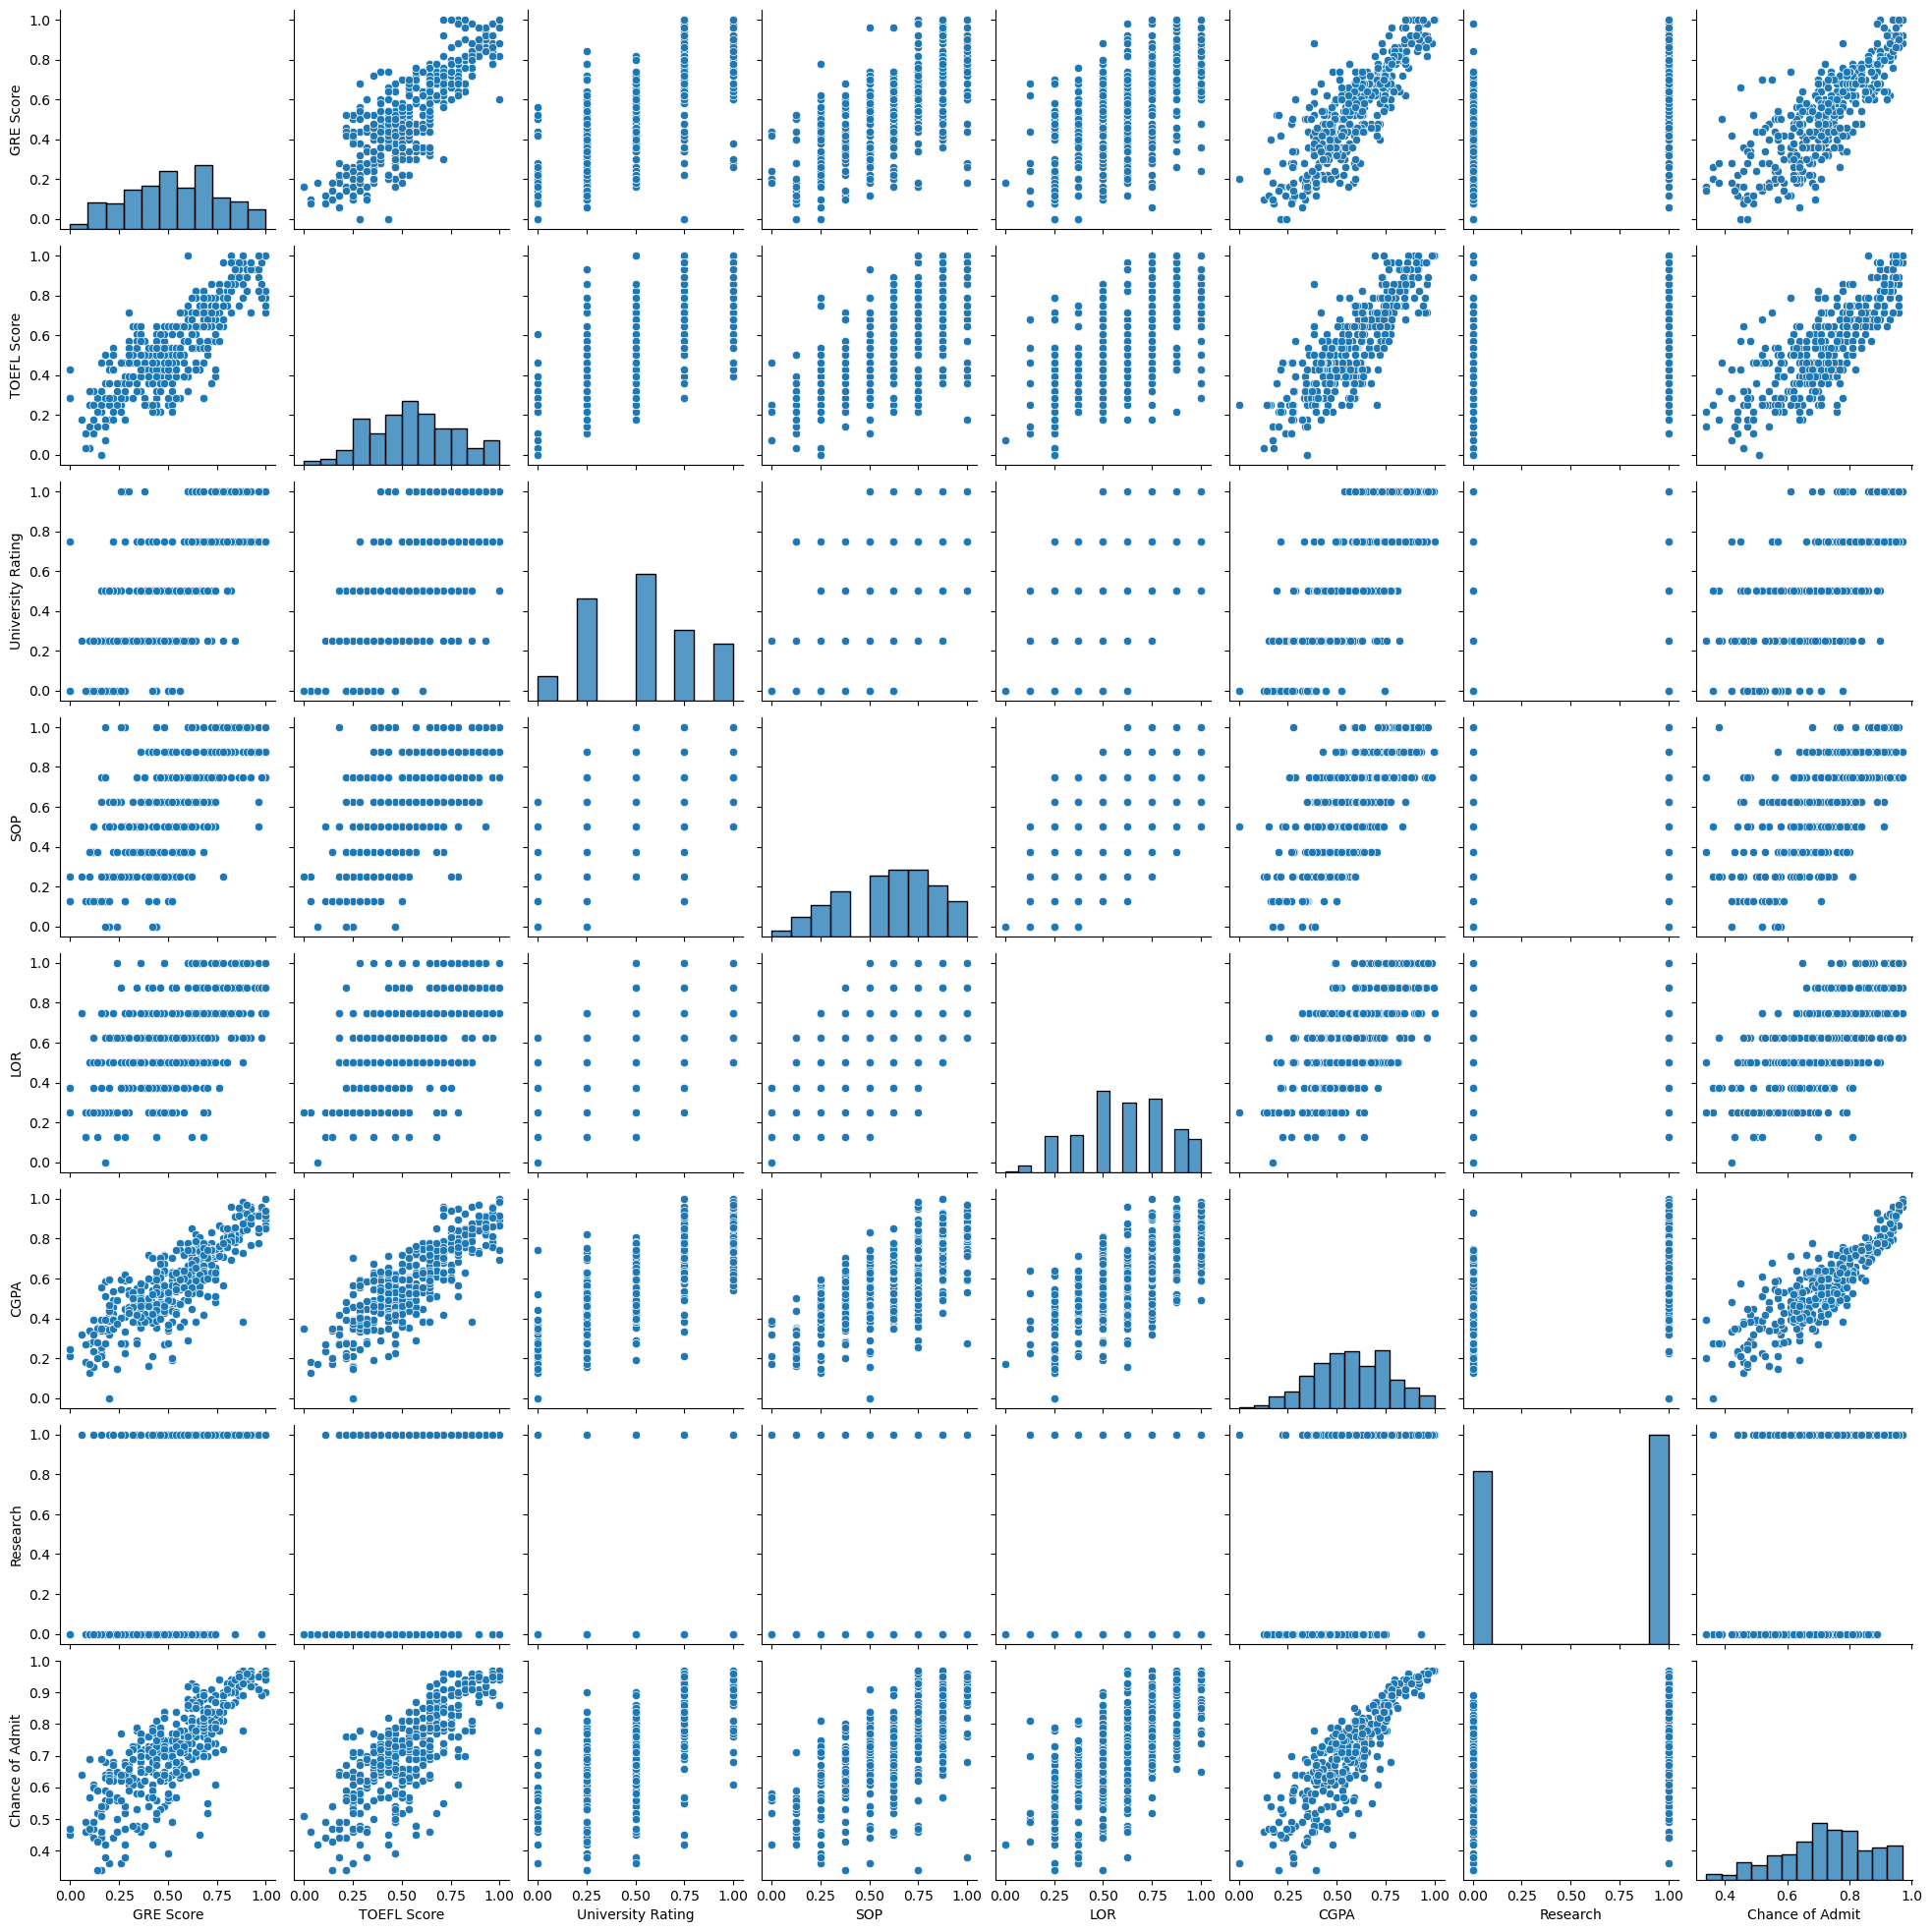

In [46]:
sns.pairplot(file)

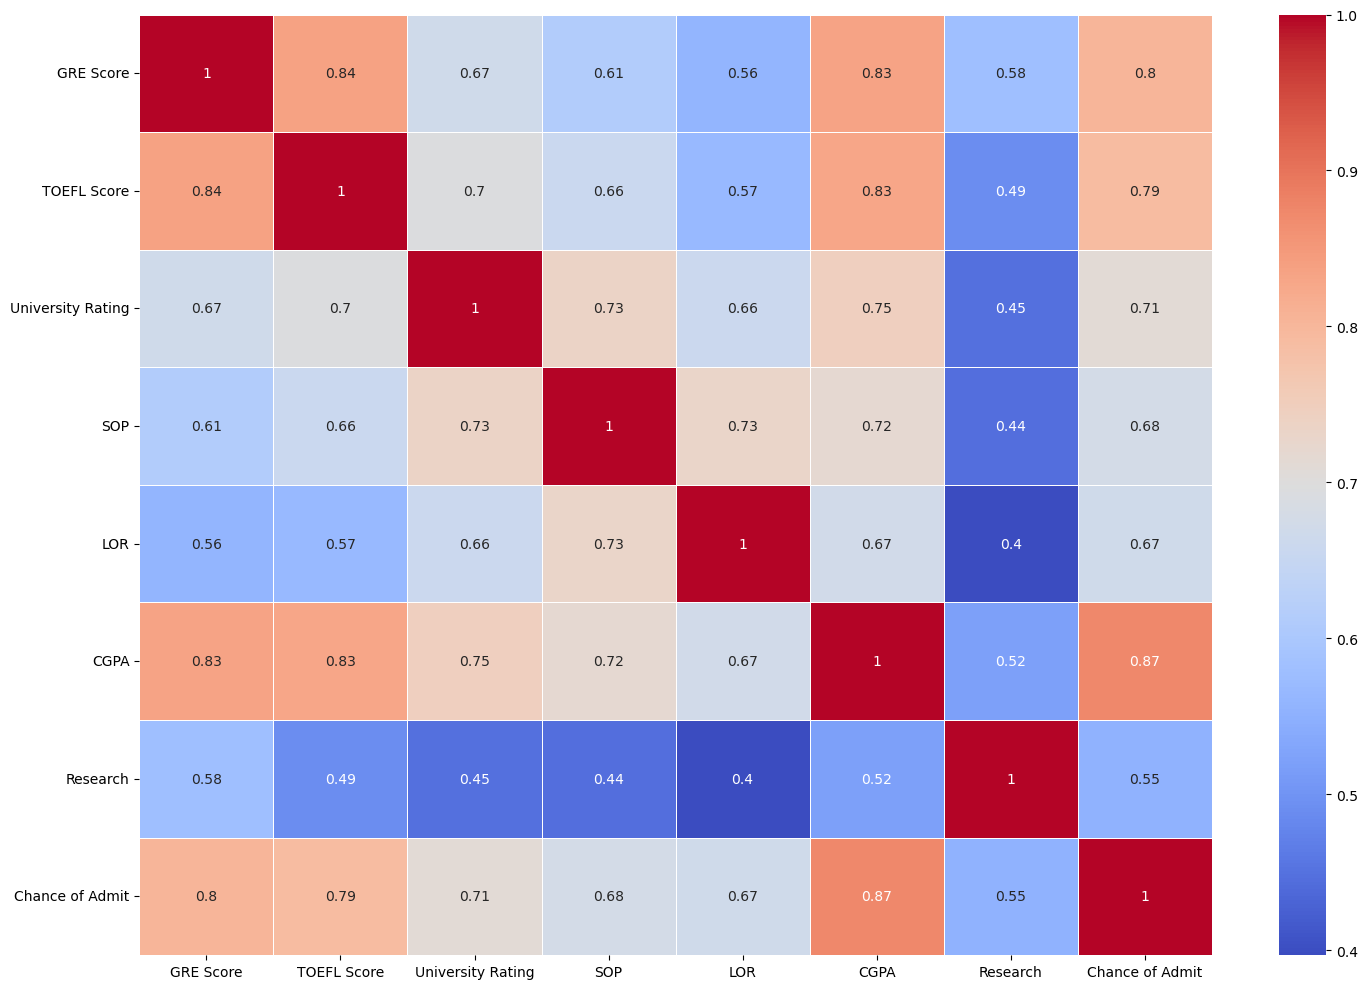

In [47]:
fig, axes = plt.subplots(1,1, figsize=(15, 10)) 
sns.heatmap(file.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.tight_layout()
plt.show()

In [48]:
label=file['Chance of Admit']
features=file.drop(labels='Chance of Admit',axis=1)

In [49]:
from sklearn.model_selection import train_test_split

## Train (60%) - Validation (20%) - Test (20%)

x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=0.4,random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)  


# Apply linear regression

In [50]:
from sklearn.linear_model import LinearRegression

model_1_LR=LinearRegression()

model_1_LR.fit(x_train,y_train)

LinearRegression()

In [51]:
r2=model_1_LR.score(x_test,y_test)
r2

0.7819021834049781

In [52]:
from sklearn.metrics import mean_squared_error

model_1_LR_predictions=model_1_LR.predict(x_test)

mse=mean_squared_error(y_test,model_1_LR_predictions)

print("mean square error = ",mse)

mean square error =  0.004648781371005372


# Step 2==> Convert label 'Chance of Admit' to classes to apply classification models
# thire are 2 ways: 
#  1- file['Chance of Admit'] = np.where(file['Chance of Admit'] >= 0.7, 1, 0)
#  2- file['Chance of Admit'] = file['Chance of Admit'].apply(lambda x: 1 if x >= 0.7 else 0)


In [53]:
file['Chance of Admit'] = np.where(file['Chance of Admit'] >= 0.7, 1, 0)

In [54]:
file

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,1
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,1
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,1
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,1
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0
...,...,...,...,...,...,...,...,...
395,0.68,0.642857,0.50,0.625,0.625,0.717949,1.0,1
396,0.70,0.535714,0.50,0.500,0.625,0.740385,1.0,1
397,0.80,0.857143,0.75,1.000,0.875,0.849359,1.0,1
398,0.44,0.392857,0.50,0.625,0.750,0.634615,0.0,0


# Apply Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

model_1_Logistic=LogisticRegression(penalty='l2',solver='sag',max_iter=300,C=10,random_state=42,class_weight='balanced')

#--------------------------------------------------
# Convert continuous target into binary classes
threshold=0.7
y_train = np.where(y_train >= threshold, 1, 0)
y_test = np.where(y_test >= threshold, 1, 0)
#--------------------------------------------------

model_1_Logistic.fit(x_train,y_train)

model_1_Logistic_predictions=model_1_Logistic.predict(x_test)

print(model_1_Logistic.score(x_test,y_test))


0.84375


              precision    recall  f1-score   support

           0       0.81      0.82      0.81        66
           1       0.87      0.86      0.87        94

    accuracy                           0.84       160
   macro avg       0.84      0.84      0.84       160
weighted avg       0.84      0.84      0.84       160

Accuracy =  0.84375
ROC-AUC Score: 0.93
Log Loss: 0.34


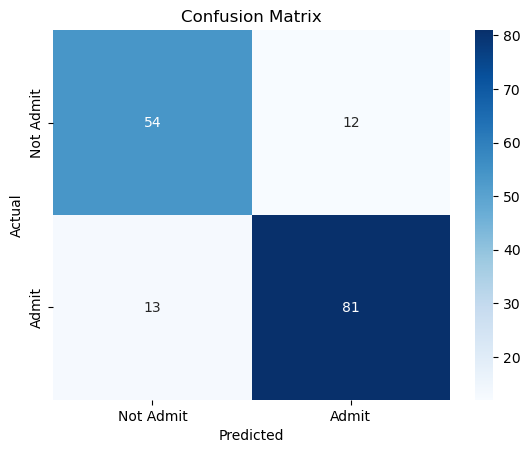

In [56]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(classification_report(y_test,model_1_Logistic_predictions))

accuracy=accuracy_score(y_test,model_1_Logistic_predictions)
print("Accuracy = ",accuracy)

from sklearn.metrics import roc_auc_score,log_loss

# Get probability predictions for positive class
y_prob = model_1_Logistic.predict_proba(x_test)[:, 1]

# Calculate ROC-AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {auc_score:.2f}")

# Compute log loss
log_loss_value = log_loss(y_test, y_prob)
print(f"Log Loss: {log_loss_value:.2f}")

confusion_matrix=confusion_matrix(y_test,model_1_Logistic_predictions)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Admit', 'Admit'], yticklabels=['Not Admit', 'Admit'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Apply Support Vector Machine (SVM) With Some Cases

In [57]:
from sklearn import svm

model_1_svm=svm.SVC(C=.5,kernel='linear')

model_1_svm.fit(x_train,y_train)

model_1_svm_predictions=model_1_svm.predict(x_test)

              precision    recall  f1-score   support

           0       0.83      0.73      0.77        66
           1       0.82      0.89      0.86        94

    accuracy                           0.82       160
   macro avg       0.83      0.81      0.82       160
weighted avg       0.83      0.82      0.82       160

Accuracy =  0.825
ROC-AUC Score: 0.93
Log Loss: 0.34


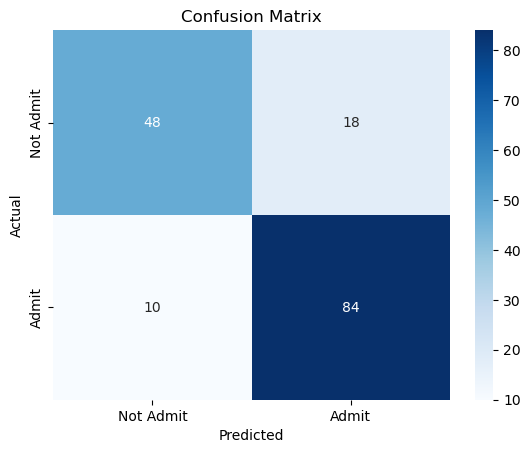

In [58]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,log_loss

print(classification_report(y_test,model_1_svm_predictions))

accuracy=accuracy_score(y_test,model_1_svm_predictions)
print("Accuracy = ",accuracy)

# Calculate ROC-AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {auc_score:.2f}")

# Compute log loss
log_loss_value = log_loss(y_test, y_prob)
print(f"Log Loss: {log_loss_value:.2f}")

confusion_matrix=confusion_matrix(y_test,model_1_svm_predictions)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Admit', 'Admit'], yticklabels=['Not Admit', 'Admit'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [59]:
from sklearn import svm

model_2_svm=svm.SVC(C=1,kernel='poly',degree=3,gamma=0.5)

model_2_svm.fit(x_train,y_train)

model_2_svm_predictions=model_2_svm.predict(x_test)


              precision    recall  f1-score   support

           0       0.81      0.82      0.81        66
           1       0.87      0.86      0.87        94

    accuracy                           0.84       160
   macro avg       0.84      0.84      0.84       160
weighted avg       0.84      0.84      0.84       160

Accuracy =  0.84375
ROC-AUC Score: 0.93
Log Loss: 0.34


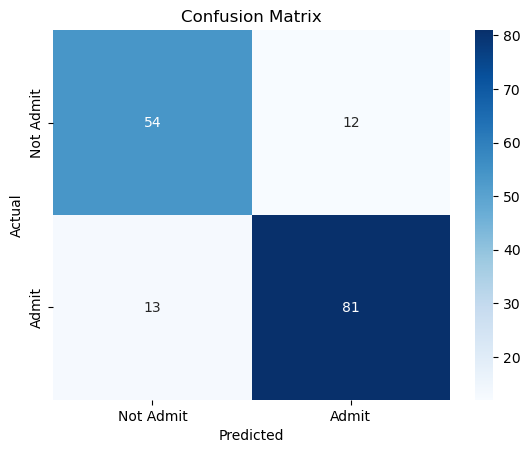

In [60]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,log_loss

print(classification_report(y_test,model_2_svm_predictions))

accuracy=accuracy_score(y_test,model_2_svm_predictions)
print("Accuracy = ",accuracy)

# Calculate ROC-AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {auc_score:.2f}")

# Compute log loss
log_loss_value = log_loss(y_test, y_prob)
print(f"Log Loss: {log_loss_value:.2f}")

confusion_matrix=confusion_matrix(y_test,model_2_svm_predictions)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Admit', 'Admit'], yticklabels=['Not Admit', 'Admit'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Let Model Choose The Best parameters By Itself

In [61]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],  
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1], 
    'degree': [2, 3, 4, 5], 
    'kernel': ['rbf', 'poly']  
}

svm = SVC()

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)  

print("Best Parameters:", grid_search.best_params_)

best_svm = grid_search.best_estimator_
accuracy = best_svm.score(x_test, y_test)
print("Test Accuracy:", accuracy)

Best Parameters: {'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Test Accuracy: 0.8375


In [62]:
from sklearn import svm

model_2_svm=svm.SVC(C=10,kernel='poly',degree=2,gamma=1)

model_2_svm.fit(x_train,y_train)

model_2_svm_predictions=model_2_svm.predict(x_test)

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        66
           1       0.83      0.90      0.87        94

    accuracy                           0.84       160
   macro avg       0.84      0.82      0.83       160
weighted avg       0.84      0.84      0.84       160

Accuracy =  0.8375
ROC-AUC Score: 0.93
Log Loss: 0.34


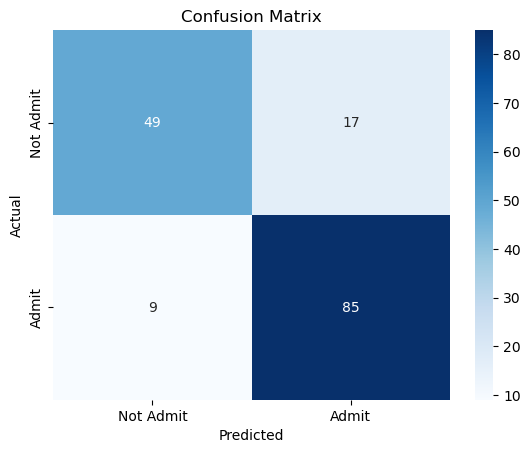

In [63]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,log_loss

print(classification_report(y_test,model_2_svm_predictions))

accuracy=accuracy_score(y_test,model_2_svm_predictions)
print("Accuracy = ",accuracy)

# Calculate ROC-AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {auc_score:.2f}")

# Compute log loss
log_loss_value = log_loss(y_test, y_prob)
print(f"Log Loss: {log_loss_value:.2f}")

confusion_matrix=confusion_matrix(y_test,model_2_svm_predictions)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Admit', 'Admit'], yticklabels=['Not Admit', 'Admit'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Apply Decision Tree

In [64]:
from sklearn import tree

model_1_DT=tree.DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=2,random_state=42)

model_1_DT.fit(x_train,y_train)

model_1_DT_prediction=model_1_DT.predict(x_test)



[Text(0.37683823529411764, 0.9545454545454546, 'x[5] <= 0.47\ngini = 0.462\nsamples = 240\nvalue = [87, 153]'),
 Text(0.11764705882352941, 0.8636363636363636, 'x[0] <= 0.59\n0.248\n76\n[65, 11]'),
 Text(0.08823529411764706, 0.7727272727272727, 'x[1] <= 0.375\n0.195\n73\n[65, 8]'),
 Text(0.058823529411764705, 0.6818181818181818, '0.0\n42\n[42, 0]'),
 Text(0.11764705882352941, 0.6818181818181818, 'x[0] <= 0.37\n0.383\n31\n[23, 8]'),
 Text(0.058823529411764705, 0.5909090909090909, 'x[5] <= 0.452\n0.133\n14\n[13, 1]'),
 Text(0.029411764705882353, 0.5, '0.0\n11\n[11, 0]'),
 Text(0.08823529411764706, 0.5, 'x[6] <= 0.5\n0.444\n3\n[2, 1]'),
 Text(0.058823529411764705, 0.4090909090909091, '0.0\n2\n[2, 0]'),
 Text(0.11764705882352941, 0.4090909090909091, '0.0\n1\n[0, 1]'),
 Text(0.17647058823529413, 0.5909090909090909, 'x[3] <= 0.312\n0.484\n17\n[10, 7]'),
 Text(0.14705882352941177, 0.5, '0.0\n3\n[3, 0]'),
 Text(0.20588235294117646, 0.5, 'x[3] <= 0.688\n0.5\n14\n[7, 7]'),
 Text(0.176470588235294

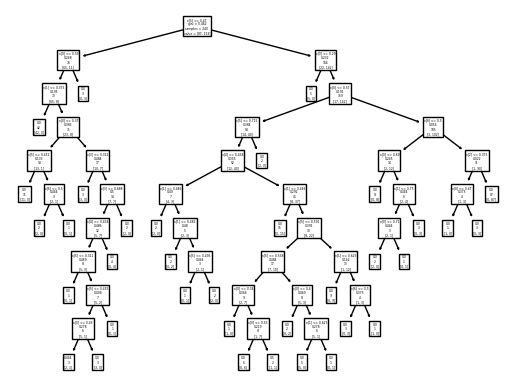

In [65]:
tree.plot_tree(model_1_DT,label='root')

              precision    recall  f1-score   support

           0       0.77      0.70      0.73        66
           1       0.80      0.85      0.82        94

    accuracy                           0.79       160
   macro avg       0.78      0.77      0.78       160
weighted avg       0.79      0.79      0.79       160

Accuracy =  0.7875
ROC-AUC Score: 0.93
Log Loss: 0.34


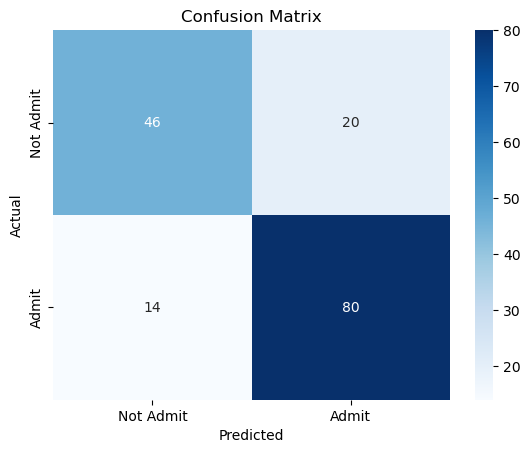

In [66]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,log_loss

print(classification_report(y_test,model_1_DT_prediction))

accuracy=accuracy_score(y_test,model_1_DT_prediction)
print("Accuracy = ",accuracy)

# Calculate ROC-AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {auc_score:.2f}")

# Compute log loss
log_loss_value = log_loss(y_test, y_prob)
print(f"Log Loss: {log_loss_value:.2f}")

confusion_matrix=confusion_matrix(y_test,model_1_DT_prediction)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Admit', 'Admit'], yticklabels=['Not Admit', 'Admit'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Let Model Choose The Best parameters By Itself

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [3, 5, 10, None],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 5, 10],  
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

print(f"Best Parameters : {grid_search.best_params_}")

best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(x_test)

print(classification_report(y_test, y_pred))


Best Parameters : {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
              precision    recall  f1-score   support

           0       0.78      0.71      0.75        66
           1       0.81      0.86      0.84        94

    accuracy                           0.80       160
   macro avg       0.80      0.79      0.79       160
weighted avg       0.80      0.80      0.80       160



In [68]:
from sklearn import tree

model_2_DT=tree.DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=1,min_samples_split=10)

model_2_DT.fit(x_train,y_train)

model_2_DT_prediction=model_2_DT.predict(x_test)

[Text(0.4125, 0.9166666666666666, 'x[5] <= 0.47\ngini = 0.462\nsamples = 240\nvalue = [87, 153]'),
 Text(0.2, 0.75, 'x[0] <= 0.59\n0.248\n76\n[65, 11]'),
 Text(0.15, 0.5833333333333334, 'x[1] <= 0.375\n0.195\n73\n[65, 8]'),
 Text(0.1, 0.4166666666666667, '0.0\n42\n[42, 0]'),
 Text(0.2, 0.4166666666666667, 'x[0] <= 0.37\n0.383\n31\n[23, 8]'),
 Text(0.1, 0.25, 'x[5] <= 0.452\n0.133\n14\n[13, 1]'),
 Text(0.05, 0.08333333333333333, '0.0\n11\n[11, 0]'),
 Text(0.15, 0.08333333333333333, '0.444\n3\n[2, 1]'),
 Text(0.3, 0.25, 'x[3] <= 0.312\n0.484\n17\n[10, 7]'),
 Text(0.25, 0.08333333333333333, '0.0\n3\n[3, 0]'),
 Text(0.35, 0.08333333333333333, '0.5\n14\n[7, 7]'),
 Text(0.25, 0.5833333333333334, '0.0\n3\n[0, 3]'),
 Text(0.625, 0.75, 'x[0] <= 0.29\n0.232\n164\n[22, 142]'),
 Text(0.575, 0.5833333333333334, '0.0\n5\n[5, 0]'),
 Text(0.675, 0.5833333333333334, 'x[0] <= 0.57\n0.191\n159\n[17, 142]'),
 Text(0.55, 0.4166666666666667, 'x[5] <= 0.715\n0.384\n54\n[14, 40]'),
 Text(0.5, 0.25, 'x[4] <= 0

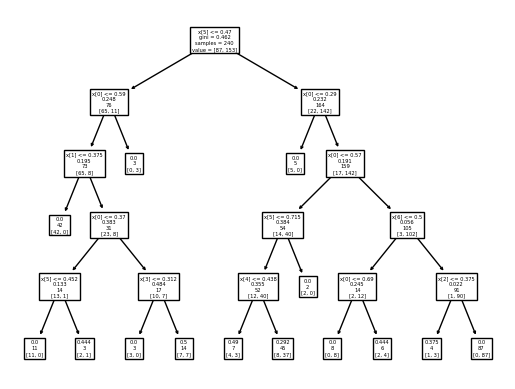

In [69]:
tree.plot_tree(model_2_DT,label='root')

              precision    recall  f1-score   support

           0       0.78      0.71      0.75        66
           1       0.81      0.86      0.84        94

    accuracy                           0.80       160
   macro avg       0.80      0.79      0.79       160
weighted avg       0.80      0.80      0.80       160

Accuracy =  0.8
ROC-AUC Score: 0.93
Log Loss: 0.34


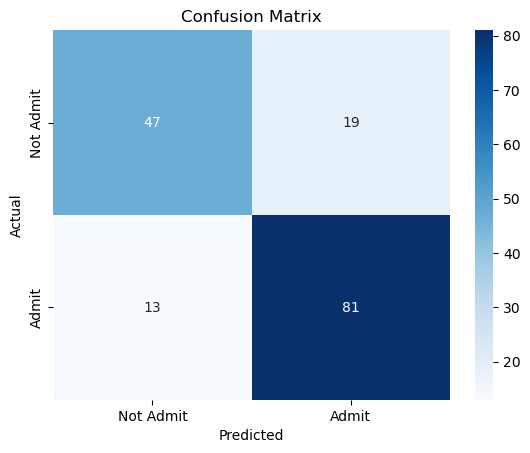

In [70]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,log_loss

print(classification_report(y_test,model_2_DT_prediction))

accuracy=accuracy_score(y_test,model_2_DT_prediction)
print("Accuracy = ",accuracy)

# Calculate ROC-AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {auc_score:.2f}")

# Compute log loss
log_loss_value = log_loss(y_test, y_prob)
print(f"Log Loss: {log_loss_value:.2f}")

confusion_matrix=confusion_matrix(y_test,model_2_DT_prediction)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Admit', 'Admit'], yticklabels=['Not Admit', 'Admit'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# “Genius is one percent inspiration, ninety-nine percent perspiration.”
